In [1]:
import h5py
import numpy as np
from dynesty.utils import resample_equal
import pycbc
from pycbc import conversions
from pycbc import cosmology
import corner
import matplotlib.pyplot as plt
import os
from pycbc import cosmology
from pycbc.conversions import snr_from_loglr
import pycbc.waveform
import MultiWave

def posterior_samples(samples,wt):
    """
    Returns posterior samples from nested samples and weights
    given by dynsety sampler
    """
    posterior_dynesty = resample_equal(samples, wt)
    return posterior_dynesty

In [5]:
nmodes=np.array([2,1])
for n in range(1):
    print (n)

0


In [2]:
file='/work/francisco.jimenez/sio/git/BH-Spectroscopy-GW190521/myrun/220_330/inference_v1.hdf'
f1 = h5py.File(file,'r')
wt = np.exp(f1['samples/logwt'] -
                      f1.attrs.get('log_evidence'))
weights = wt/np.sum(wt)
out_file=os.path.dirname(file)
f1['samples/'].keys()

<KeysViewHDF5 ['amp330', 'final_mass', 'final_spin', 'inclination', 'logamp220', 'loglikelihood', 'logwt', 'phi220', 'phi330']>

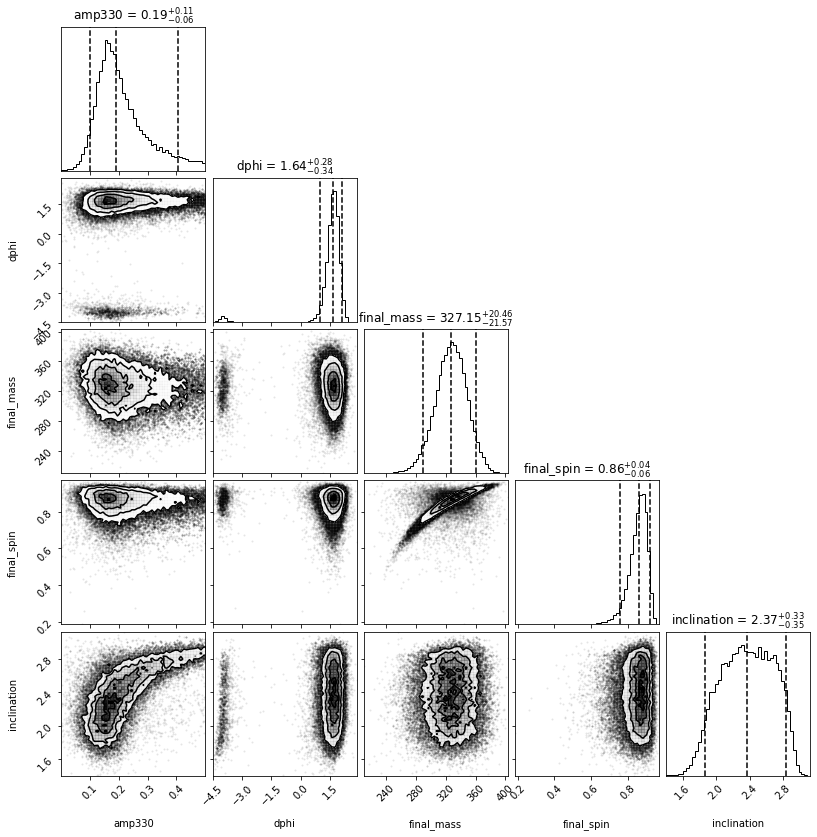

In [3]:
weights = wt/np.sum(wt)
amp330 = posterior_samples(f1['samples/amp330'][:],weights)
phi220 = posterior_samples(f1['samples/phi220'][:],weights)
phi330 = posterior_samples(f1['samples/phi330'][:],weights)
final_mass = posterior_samples(f1['samples/final_mass'][:],weights)
final_spin = posterior_samples(f1['samples/final_spin'][:],weights)
inclination = posterior_samples(f1['samples/inclination'][:],weights)





data=np.array([amp330,phi220-phi330,final_mass,final_spin,inclination])
figure = corner.corner(data.T,bins=50,quantiles=[0.05,0.5,0.95],
                          labels=['amp330','dphi','final_mass','final_spin','inclination'],
              show_titles=True, title_kwargs={"fontsize": 12})

plt.savefig(out_file+'/cornerplot.png', bbox_inches='tight')

plt.show()

In [2]:
file='/work/francisco.jimenez/sio/git/BH-Spectroscopy-GW190521/myrun/220_330/inference.hdf'
f1 = h5py.File(file,'r')
wt = np.exp(f1['samples/logwt'] -
                      f1.attrs.get('log_evidence'))
weights = wt/np.sum(wt)
out_file=os.path.dirname(file)
f1['samples/'].keys()

<KeysViewHDF5 ['amp330', 'coa_phase', 'final_mass', 'final_spin', 'inclination', 'logamp220', 'loglikelihood', 'logwt', 'phi220', 'phi330']>

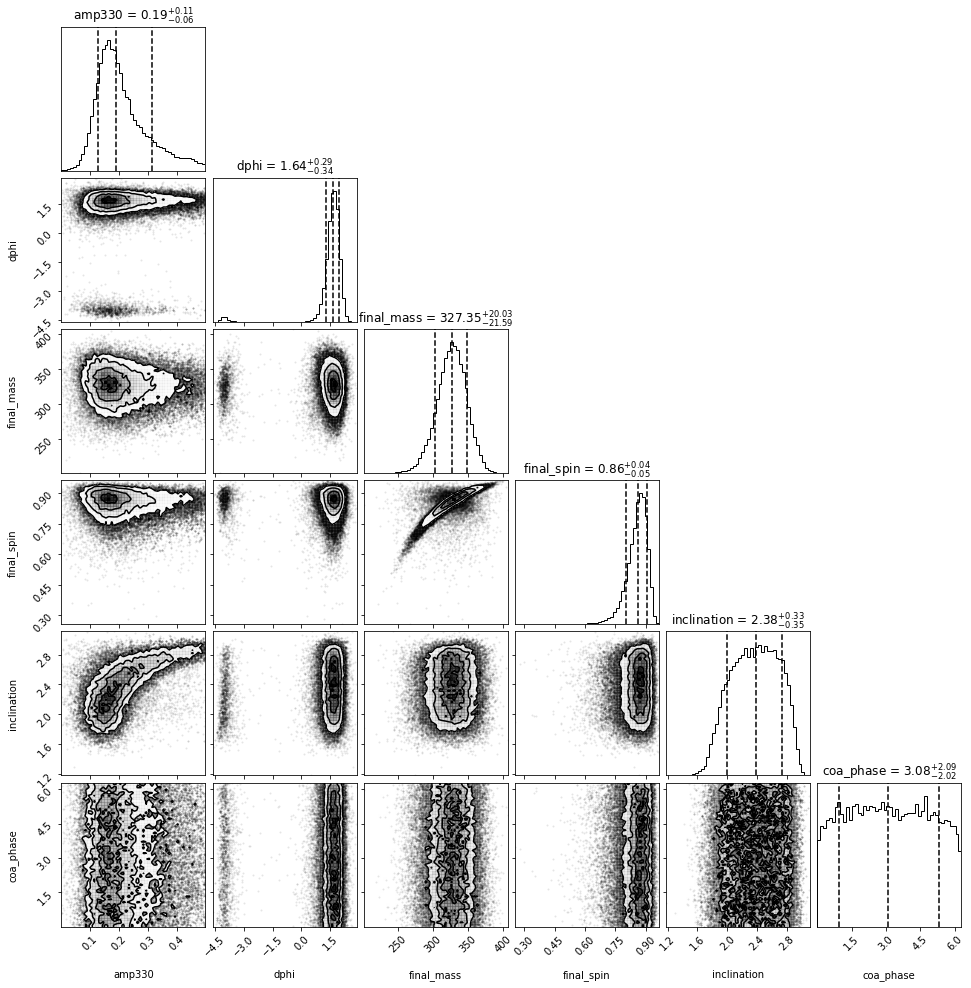

In [3]:
weights = wt/np.sum(wt)
amp330 = posterior_samples(f1['samples/amp330'][:],weights)
phi220 = posterior_samples(f1['samples/phi220'][:],weights)
phi330 = posterior_samples(f1['samples/phi330'][:],weights)
final_mass = posterior_samples(f1['samples/final_mass'][:],weights)
final_spin = posterior_samples(f1['samples/final_spin'][:],weights)
inclination = posterior_samples(f1['samples/inclination'][:],weights)
coa_phase = posterior_samples(f1['samples/coa_phase'][:],weights)


data=np.array([amp330,phi220-phi330,final_mass,final_spin,inclination,coa_phase])
figure = corner.corner(data.T,bins=50,quantiles=[0.14,0.5,0.86],
                          labels=['amp330','dphi','final_mass','final_spin','inclination','coa_phase'],
              show_titles=True, title_kwargs={"fontsize": 12})

plt.savefig(out_file+'/cornerplot.png', bbox_inches='tight')

plt.show()

In [15]:
file='/work/francisco.jimenez/sio/git/BH-Spectroscopy-GW190521/posteriors/kerr/220_330/KERR-220_330-07MS.hdf'
f1 = h5py.File(file,'r')
wt = np.exp(f1['samples/logwt']-
                      f1.attrs.get('log_evidence'))
weights = wt/np.sum(wt)
out_file=os.path.dirname(file)
f1['samples/'].keys()

<KeysViewHDF5 ['amp220', 'amp330', 'f220', 'f330', 'final_mass', 'final_spin', 'inclination', 'logamp220', 'loglikelihood', 'loglikelihood220', 'loglikelihood330', 'lognl', 'logwt', 'phi220', 'phi330', 'polarization', 'tau220', 'tau330']>

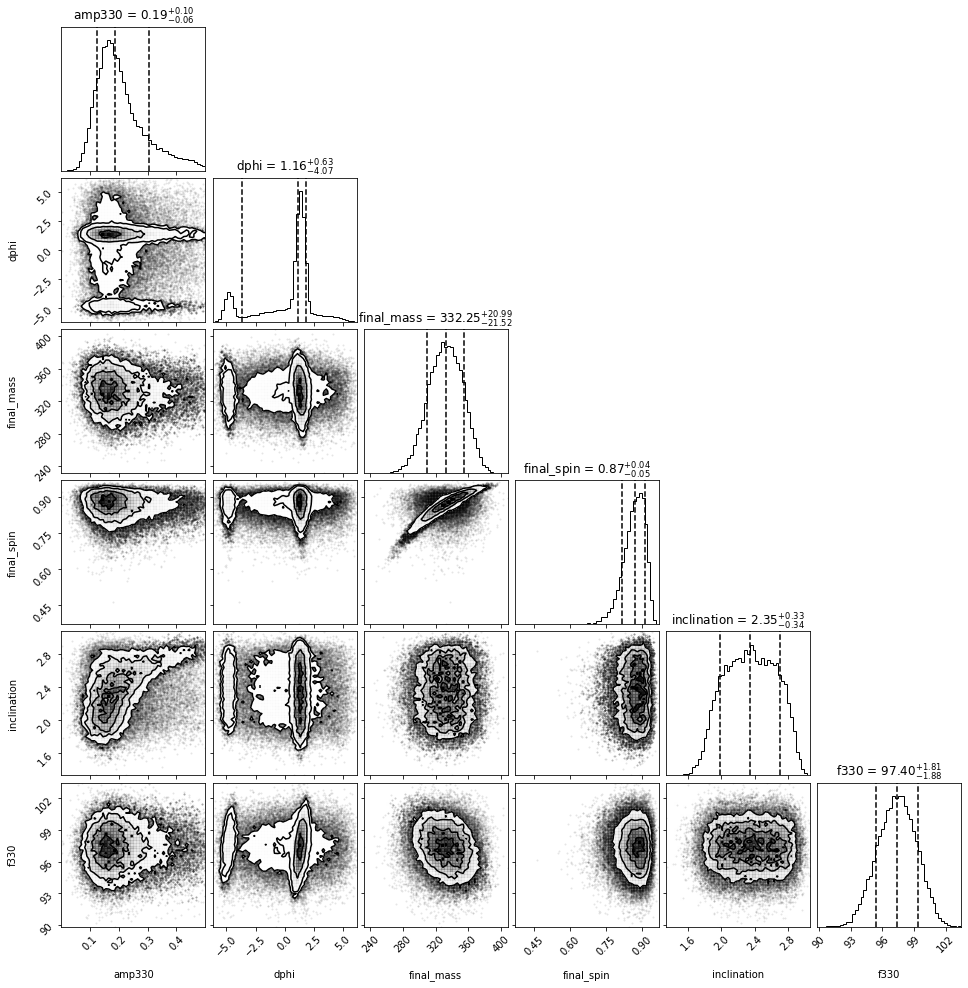

In [16]:
weights = wt/np.sum(wt)
amp330 = posterior_samples(f1['samples/amp330'][:],weights)
phi220 = posterior_samples(f1['samples/phi220'][:],weights)
phi330 = posterior_samples(f1['samples/phi330'][:],weights)
f330 = posterior_samples(f1['samples/f330'][:],weights)
final_mass = posterior_samples(f1['samples/final_mass'][:],weights)
final_spin = posterior_samples(f1['samples/final_spin'][:],weights)
inclination = posterior_samples(f1['samples/inclination'][:],weights)




data=np.array([amp330,phi220-phi330,final_mass,final_spin,inclination,f330])
figure = corner.corner(data.T,bins=50,quantiles=[0.14,0.5,0.86],
                          labels=['amp330','dphi','final_mass','final_spin','inclination','f330'],
              show_titles=True, title_kwargs={"fontsize": 12})

plt.savefig(out_file+'/cornerplot.png', bbox_inches='tight')

plt.show()

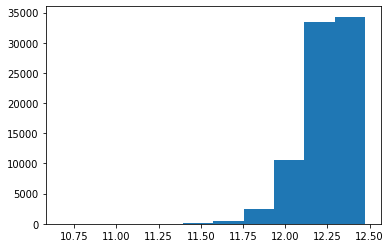

In [65]:
loglr=f1['samples/loglikelihood'][:] - f1['samples/lognl'][:]
snr = pycbc.conversions.snr_from_loglr(loglr)
plt.hist(snr);

In [8]:
file='/work/francisco.jimenez/sio/git/BH-Spectroscopy-GW190521/myrun/220_330/inference_ngr.hdf'
f1 = h5py.File(file,'r')
wt = np.exp(f1['samples/logwt'] -
                      f1.attrs.get('log_evidence'))
weights = wt/np.sum(wt)
out_file=os.path.dirname(file)
f1['samples/'].keys()

<KeysViewHDF5 ['amp330', 'coa_phase', 'delta_f330', 'delta_tau330', 'final_mass', 'final_spin', 'inclination', 'logamp220', 'loglikelihood', 'logwt', 'phi220', 'phi330', 'polarization']>

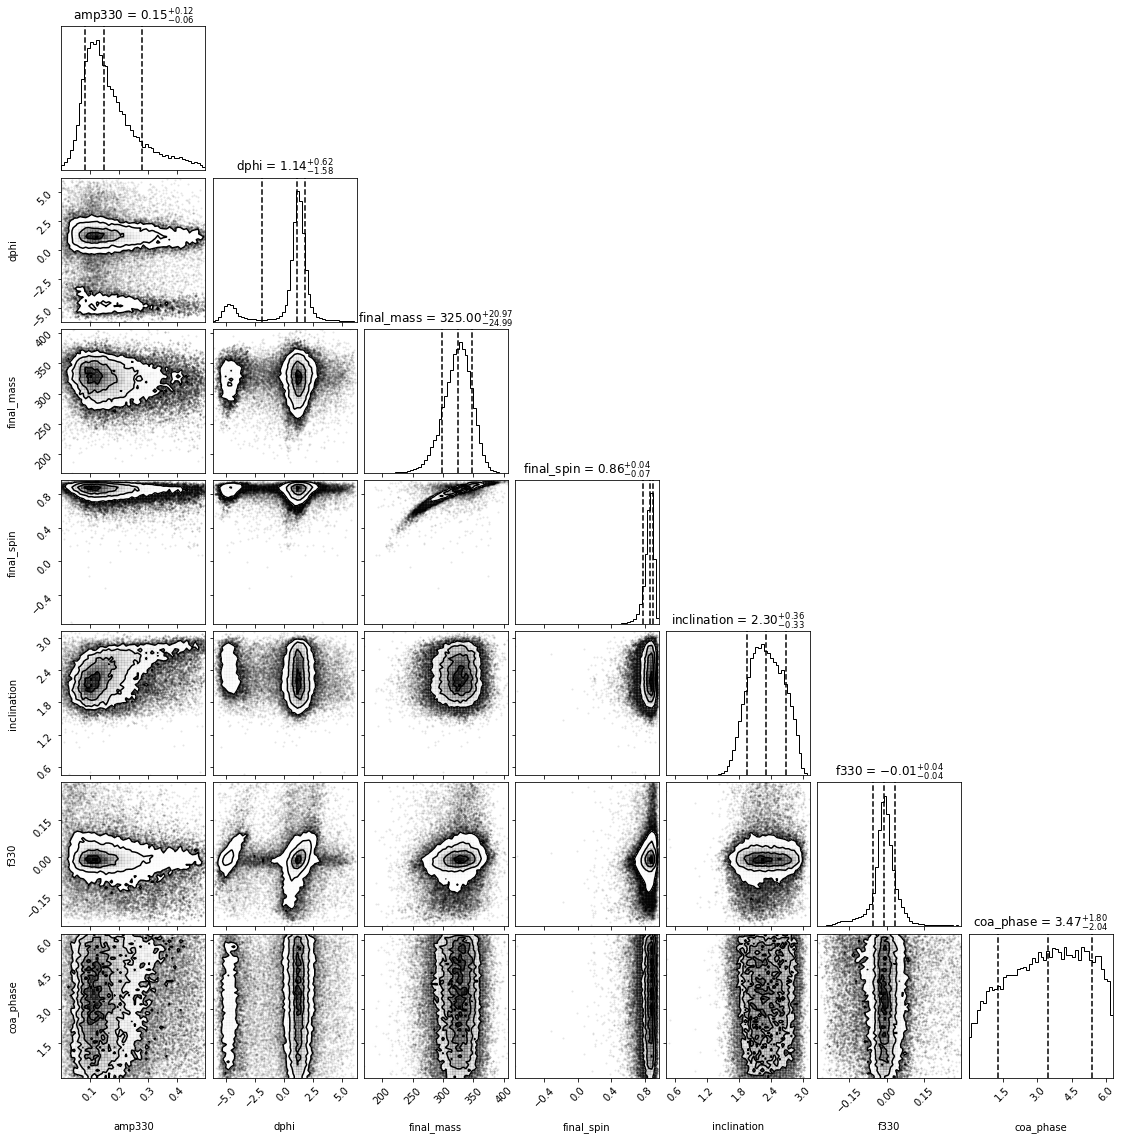

In [13]:
weights = wt/np.sum(wt)
amp330 = posterior_samples(f1['samples/amp330'][:],weights)
phi220 = posterior_samples(f1['samples/phi220'][:],weights)
phi330 = posterior_samples(f1['samples/phi330'][:],weights)
delta_f330 = posterior_samples(f1['samples/delta_f330'][:],weights)
final_mass = posterior_samples(f1['samples/final_mass'][:],weights)
final_spin = posterior_samples(f1['samples/final_spin'][:],weights)
inclination = posterior_samples(f1['samples/inclination'][:],weights)
coa_phase = posterior_samples(f1['samples/coa_phase'][:],weights)



data=np.array([amp330,phi220-phi330,final_mass,final_spin,inclination,delta_f330,coa_phase])
figure = corner.corner(data.T,bins=50,quantiles=[0.14,0.5,0.86],
                          labels=['amp330','dphi','final_mass','final_spin','inclination','f330','coa_phase'],
              show_titles=True, title_kwargs={"fontsize": 12})

plt.savefig(out_file+'/cornerplot.png', bbox_inches='tight')

plt.show()

In [68]:
np.savetxt('/work/francisco.jimenez/sio/git/BH-Spectroscopy-GW190521/posteriors/kerr/220_330/snr.txt', snr)

In [30]:
posmax=np.argmax(f1['samples/loglikelihood'])
comoving_volume = posterior_samples(f1['samples/comoving_volume'][:],weights)[posmax]
redshift =  cosmology.redshift_from_comoving_volume(comoving_volume)

srcmtotal = posterior_samples(f1['samples/srcmtotal'][:],weights)[posmax]*(1+redshift)
distance = cosmology.distance_from_comoving_volume(comoving_volume)
delta_tc = posterior_samples(f1['samples/delta_tc'][:],weights)[posmax]
dec = posterior_samples(f1['samples/dec'][:],weights)[posmax]
inclination = posterior_samples(f1['samples/inclination'][:],weights)[posmax]
q = posterior_samples(f1['samples/q'][:],weights)[posmax]
ra = posterior_samples(f1['samples/ra'][:],weights)[posmax]
spin1_a = posterior_samples(f1['samples/spin1_a'][:],weights)[posmax]
spin1_polar = posterior_samples(f1['samples/spin1_polar'][:],weights)[posmax]
spin1_azimuthal = posterior_samples(f1['samples/spin1_azimuthal'][:],weights)[posmax]

spin2_a = posterior_samples(f1['samples/spin2_a'][:],weights)[posmax]
spin2_polar = posterior_samples(f1['samples/spin2_polar'][:],weights)[posmax]
spin2_azimuthal = posterior_samples(f1['samples/spin2_azimuthal'][:],weights)[posmax]
